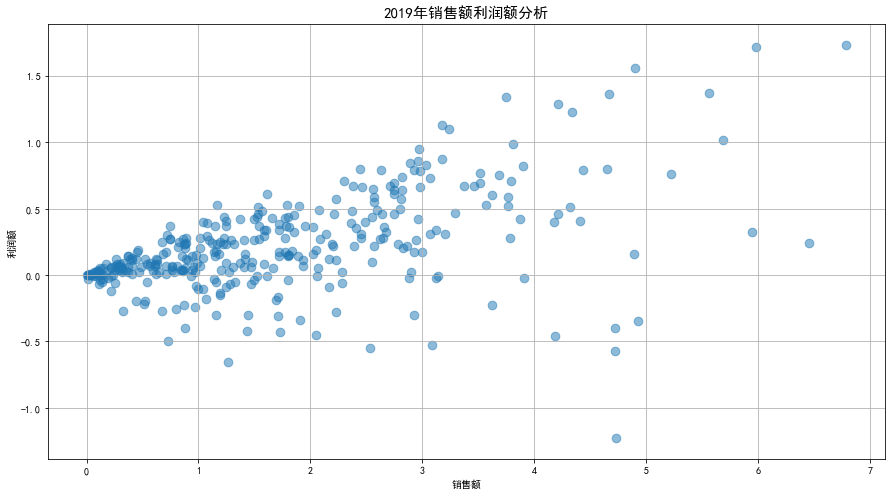

In [2]:
# -*- coding: utf-8 -*-

#声明Notebook类型，必须在引入pyecharts.charts等模块前声明
from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB

import matplotlib.pyplot as plt
import numpy as np
from impala.dbapi import connect
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False

#连接Hadoop数据库
v1 = []
v2 = []
v3 = []
conn = connect(host='192.168.1.7', port=10000, database='sales',auth_mechanism='NOSASL',user='root')
cursor = conn.cursor()

#读取Hadoop订单表数据
sql_num = "SELECT order_date,ROUND(SUM(sales)/10000,2),ROUND(SUM(profit)/10000,2) FROM orders WHERE dt=2019 GROUP BY order_date"
cursor.execute(sql_num)
sh = cursor.fetchall()
for s in sh:
    v1.append(s[0])
    v2.append(s[1])
    v3.append(s[2])

plt.figure(figsize=(15,8))         #设置图形大小
plt.scatter(v2, v3, marker='o', s=75, alpha=0.5)  #marker点的形状，s点的大小，alpha点的透明度
plt.xlabel('销售额', fontsize=10)
plt.ylabel('利润额', fontsize=10)
plt.title('2019年销售额利润额分析', fontsize=15)
plt.grid(True)
plt.show()